In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



# Introduction

This notebook generates the various data representations in lecture 12. It is easy to generalize this to other applications.

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib as mpl
import palettable
import numpy as np
import math
import seaborn as sns
from collections import defaultdict


%matplotlib inline

# Here, we customize the various matplotlib parameters for font sizes and define a color scheme.
# As mentioned in the lecture, the typical defaults in most software are not optimal from a
# data presentation point of view. You need to work hard at selecting these parameters to ensure
# an effective data presentation.
colors = palettable.colorbrewer.qualitative.Set1_4.mpl_colors
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.labelsize'] = 30 
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24 


data = """105 221 183 186 121 181 180 143
97  154 153 174 120 168 167 141
245 228 174 199 181 158 176 110
163 131 154 115 160 208 158 133
207 180 190 193 194 133 156 123
134 178 76  167 184 135 229 146
218 157 101 171 165 172 158 169
199 151 142 163 145 171 148 158
160 175 149 87  160 237 150 135
196 201 200 176 150 170 118 149"""

data = [[int(x) for x in d.split()] for d in data.split("\n")]
d = np.array(data).flatten()

In [3]:
min_val = d.min()
max_val = d.max()
start_val = math.floor(min_val / 10) * 10
mean = np.average(d)
median = np.median(d)
print("Min value = %d, Max value = %d." % (min_val, max_val))
print("Mean = %.1f" % mean) 
print("Median = %.1f" % median)
print("Standard deviation = %.1f" % np.sqrt(np.var(d)))

Min value = 76, Max value = 245.
Mean = 162.7
Median = 161.5
Standard deviation = 33.6


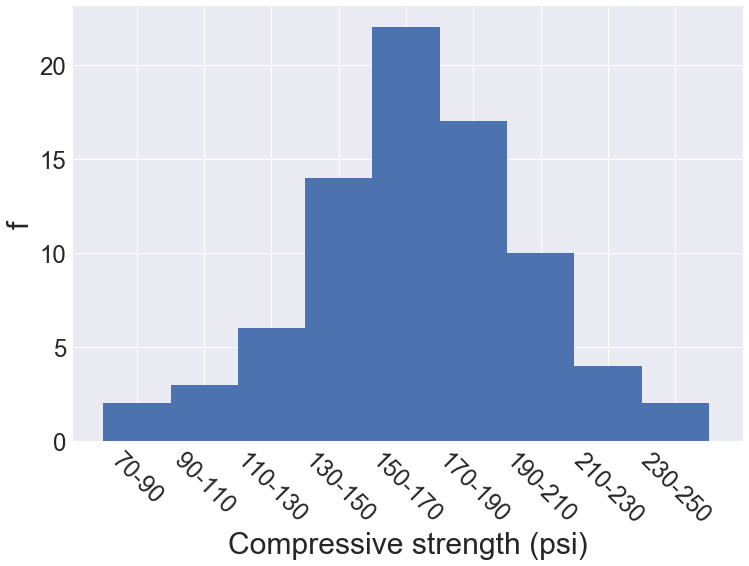

In [4]:
freq, bins = np.histogram(d, bins=np.arange(70, 260, 20))
plt.figure(figsize=(12,8))
bins = np.arange(70, 260, 20)
plt.hist(np.array(d), bins=bins)
plt.xticks(bins + 10, ["%d-%d" % (bins[i], bins[i+1]) for i in range(len(bins) - 1)], rotation=-45)
ylabel = plt.ylabel("f")
xlabel = plt.xlabel("Compressive strength (psi)")

# Stem and leaf

The code below shows how to generate a stem and leaf display.

In [5]:
def generate_stem_and_leaf(data):
    stem_and_leaf = defaultdict(list)
    for i in data:
        k = int(math.floor(i / 10))
        v = int(i % 10)
        stem_and_leaf[k].append(v)
    for k in sorted(stem_and_leaf.keys()):
        print("%02d | %s" % (k, " ".join(["%d" % i for i in stem_and_leaf[k]])))

In [6]:
generate_stem_and_leaf(d)

07 | 6
08 | 7
09 | 7
10 | 5 1
11 | 0 5 8
12 | 1 0 3
13 | 1 3 3 4 5 5
14 | 3 1 6 2 5 8 9 9
15 | 4 3 8 4 8 6 7 8 1 8 0 0
16 | 8 7 3 0 7 5 9 3 0 0
17 | 4 4 6 8 1 2 1 5 6 0
18 | 3 6 1 0 1 0 4
19 | 9 0 3 4 9 6
20 | 8 7 1 0
21 | 8
22 | 1 8 9
23 | 7
24 | 5


# Boxplot

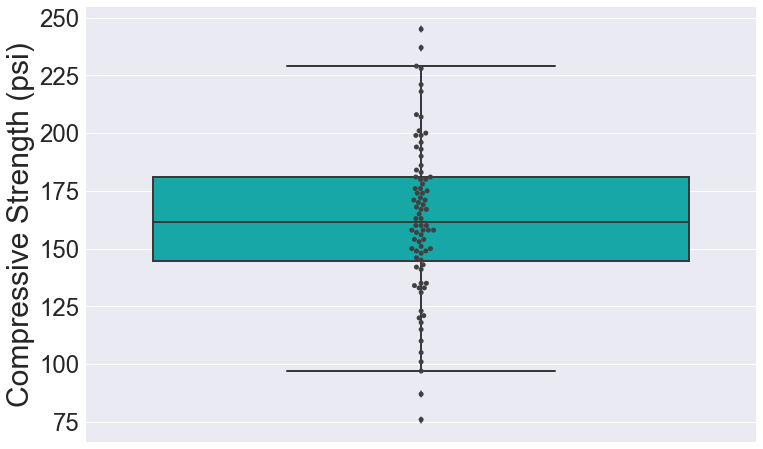

In [7]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y=d, color="c")
ax = sns.swarmplot(y=d, color=".25") # We add the swarm plot as well to show all data points.
ylabel = plt.ylabel("Compressive Strength (psi)")